<a href="https://colab.research.google.com/github/SutapaNayak/Linear-regression/blob/main/startup_MultiVariateLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [2]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [5]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


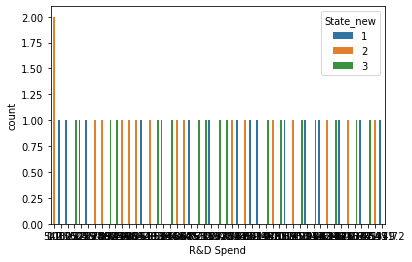

In [37]:
sns.countplot(x="R&D Spend",hue="State_new", data=df)

In [6]:
df.keys()

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
df.shape

(50, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [13]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [14]:
def State_new(x):
    if x== "New York":
     return 1
    if x== "California":
     return 2
    if x== "Florida":
     return 3

In [15]:
df['State_new']=df['State'].apply(State_new)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
 5   State_new        50 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
df.drop(['State'],axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   State_new        50 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [22]:
y=df['Profit']
y.head()


0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [23]:
y.shape

(50,)

In [24]:
x=df.drop('Profit',axis=1)
x.head()

,R&D Spend,Administration,Marketing Spend,State_new
0,165349.20,136897.80,471784.10,1
1,162597.70,151377.59,443898.53,2
2,153441.51,101145.55,407934.54,3
3,144372.41,118671.85,383199.62,1
4,142107.34,91391.77,366168.42,3


In [25]:
x.shape

(50, 4)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.33)

In [27]:
lm=LinearRegression()
lm.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred_train=lm.predict(x_train)
y_pred_test=lm.predict(x_test)


In [29]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_test)
print(mse)

176959396.73618254


In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_test)

0.9042446010085897

In [31]:
lm.predict([[165349.20,136897.80,471784.10,1]])

array([189079.37012865])

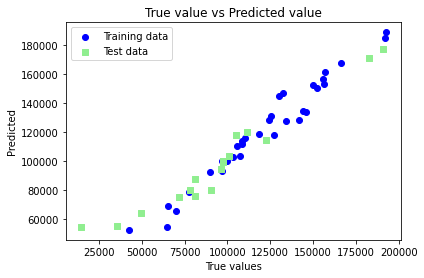

In [39]:
plt.scatter(y_train ,y_pred_train,c='blue',marker='o',label='Training data')

plt.scatter(y_test,y_pred_test ,c='lightgreen',marker='s',label='Test data')

plt.xlabel('True values')

plt.ylabel('Predicted')

plt.title("True value vs Predicted value")

plt.legend(loc= 'upper left')

#plt.hlines(y=0,xmin=0,xmax=50)

plt.plot()

plt.show()